다양한 라이브러리로 수치해석적 근 찾기
함수: f(x) = e^x * x / (x^4 + 5x^2 - 4x - 5) - 1

1. SciPy fsolve
------------------------------
근: x ≈ -0.6302119847, f(x) ≈ 2.40e-13
근: x ≈ 1.5981434712, f(x) ≈ 4.44e-16
근: x ≈ 4.9476305680, f(x) ≈ 2.22e-16
fsolve로 찾은 근: 3개

2. SciPy root_scalar
------------------------------
근 (Brent): x ≈ 4.9476305680, f(x) ≈ -8.40e-14
근 (Newton): x ≈ 1.5981434712, f(x) ≈ 4.44e-16
root_scalar로 찾은 근: 2개

3. SciPy root
------------------------------

hybr 방법:
  근: x ≈ -0.6302119847, f(x) ≈ 2.40e-13
  근: x ≈ 1.5981434712, f(x) ≈ 4.44e-16
  근: x ≈ 4.9476305680, f(x) ≈ 2.22e-16

lm 방법:
  근: x ≈ -505.0000000000, f(x) ≈ -1.00e+00
  근: x ≈ -303.0000000000, f(x) ≈ -1.00e+00
  근: x ≈ -76.9453837745, f(x) ≈ -1.00e+00
  근: x ≈ -15.1860786902, f(x) ≈ -1.00e+00
  근: x ≈ -0.6302119847, f(x) ≈ -1.87e-14
  근: x ≈ -14.0193371599, f(x) ≈ -1.00e+00
  근: x ≈ 1.5981434712, f(x) ≈ -3.33e-16
  근: x ≈ 4.9476305680, f(x) ≈ -1.11e-16

broyden1 방법:

anderson 방법:

root로 찾은 근: 8개

4. NumPy roots (다항식 근, 참고용)

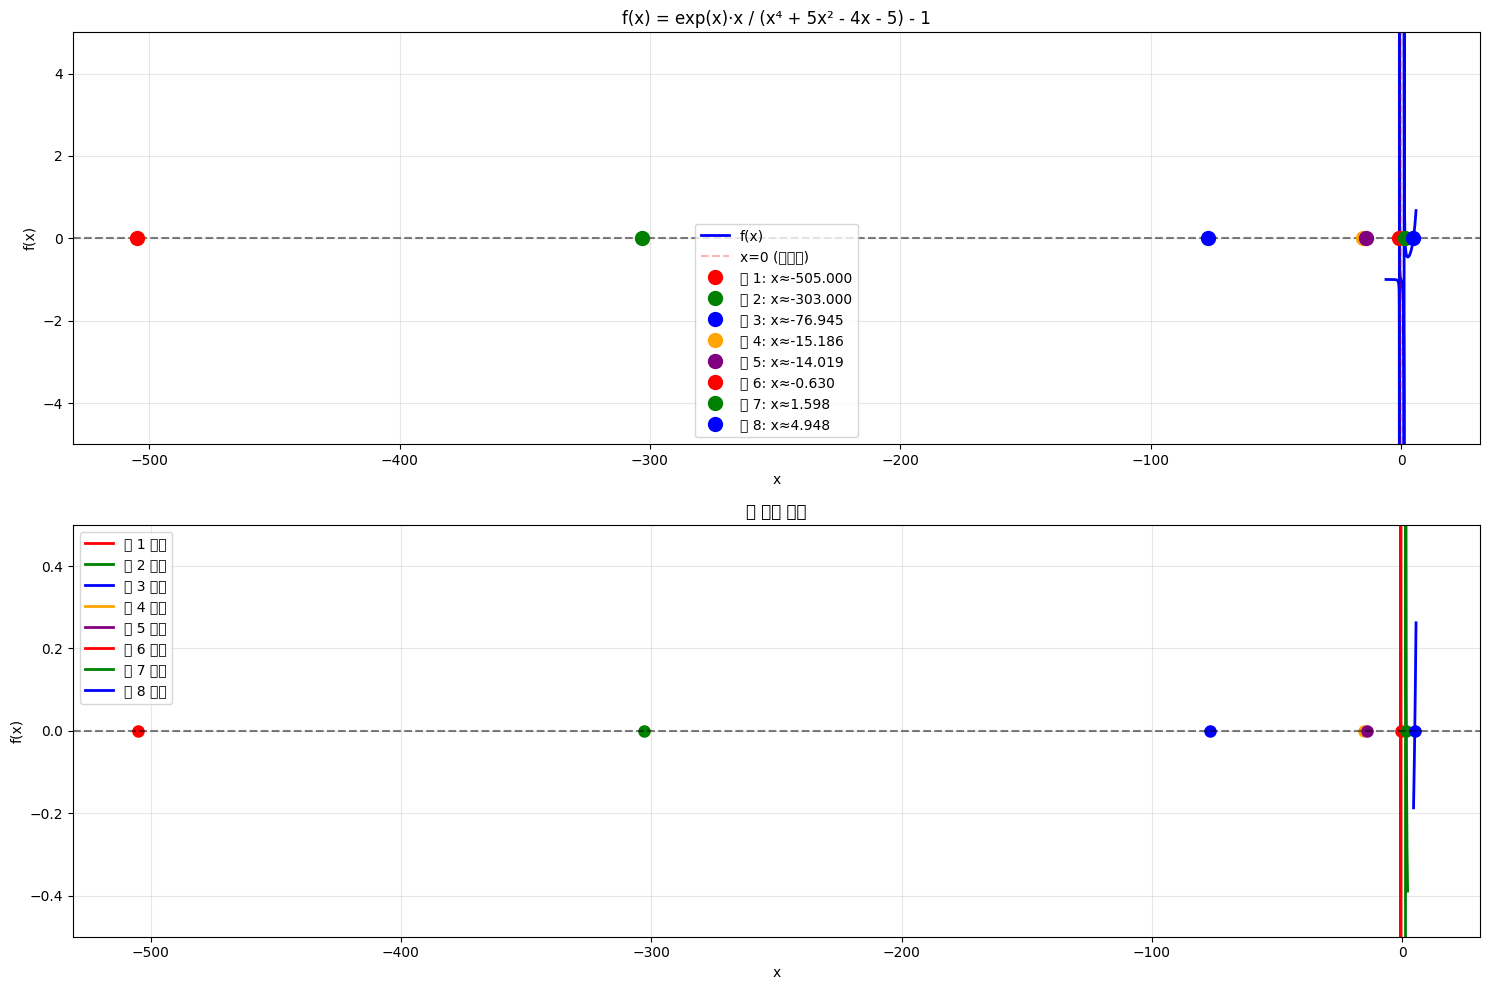

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, root_scalar, root, brentq, newton
from scipy.optimize import minimize_scalar
import warnings
warnings.filterwarnings('ignore')

# 함수 정의
def f(x):
    """f(x) = e^x * x / (x^4 + 5x^2 - 4x - 5) - 1"""
    if x == 0:
        return np.inf
    try:
        return np.exp(x) * x / (x**4 + 5*x**2 - 4*x - 5) - 1
    except:
        return np.inf

def f_derivative(x):
    """f(x)의 1차 도함수 (수치적 계산)"""
    h = 1e-8
    return (f(x + h) - f(x - h)) / (2 * h)

print("다양한 라이브러리로 수치해석적 근 찾기")
print("=" * 60)
print("함수: f(x) = e^x * x / (x^4 + 5x^2 - 4x - 5) - 1")
print("=" * 60)

# 초기값들
initial_guesses = [-5, -3, -2, -1, -0.5, 0.5, 1, 1.5, 2, 3, 4, 5]
all_roots = {}

# 1. SciPy - fsolve (가장 일반적)
print("\n1. SciPy fsolve")
print("-" * 30)
roots_fsolve = []

for guess in initial_guesses:
    try:
        root_val = fsolve(f, guess, full_output=True)
        if root_val[2] == 1:  # 수렴 성공
            x_root = root_val[0][0]
            # 중복 제거
            if not any(abs(x_root - r) < 1e-8 for r in roots_fsolve):
                roots_fsolve.append(x_root)
                print(f"근: x ≈ {x_root:.10f}, f(x) ≈ {f(x_root):.2e}")
    except:
        continue

all_roots['fsolve'] = sorted(roots_fsolve)
print(f"fsolve로 찾은 근: {len(roots_fsolve)}개")

# 2. SciPy - root_scalar (단일 변수 최적화)
print("\n2. SciPy root_scalar")
print("-" * 30)
roots_root_scalar = []

# Brent 방법 (구간 필요)
intervals = [(-6, -4), (-3, -1), (-1, 0.1), (0.1, 1), (1, 2), (2, 4), (4, 6)]

for a, b in intervals:
    try:
        # 구간 양 끝에서 함수값이 다른 부호를 가져야 함
        if f(a) * f(b) < 0:
            result = root_scalar(f, bracket=[a, b], method='brentq')
            if result.converged:
                x_root = result.root
                if not any(abs(x_root - r) < 1e-8 for r in roots_root_scalar):
                    roots_root_scalar.append(x_root)
                    print(f"근 (Brent): x ≈ {x_root:.10f}, f(x) ≈ {f(x_root):.2e}")
    except:
        continue

# Newton 방법
for guess in initial_guesses:
    try:
        result = root_scalar(f, x0=guess, fprime=f_derivative, method='newton')
        if result.converged:
            x_root = result.root
            if not any(abs(x_root - r) < 1e-8 for r in roots_root_scalar):
                roots_root_scalar.append(x_root)
                print(f"근 (Newton): x ≈ {x_root:.10f}, f(x) ≈ {f(x_root):.2e}")
    except:
        continue

all_roots['root_scalar'] = sorted(roots_root_scalar)
print(f"root_scalar로 찾은 근: {len(roots_root_scalar)}개")

# 3. SciPy - root (다변수도 가능하지만 단변수로 사용)
print("\n3. SciPy root")
print("-" * 30)
roots_root = []

methods = ['hybr', 'lm', 'broyden1', 'anderson']

for method in methods:
    print(f"\n{method} 방법:")
    method_roots = []
    for guess in initial_guesses:
        try:
            result = root(f, guess, method=method)
            if result.success:
                x_root = result.x[0]
                if not any(abs(x_root - r) < 1e-8 for r in method_roots):
                    method_roots.append(x_root)
                    print(f"  근: x ≈ {x_root:.10f}, f(x) ≈ {f(x_root):.2e}")
        except:
            continue
    
    # 전체 근 리스트에 추가
    for root_val in method_roots:
        if not any(abs(root_val - r) < 1e-8 for r in roots_root):
            roots_root.append(root_val)

all_roots['root'] = sorted(roots_root)
print(f"\nroot로 찾은 근: {len(roots_root)}개")

# 4. NumPy - roots (다항식 근 - 참고용)
print("\n4. NumPy roots (다항식 근, 참고용)")
print("-" * 30)
print("주어진 함수는 초월함수이므로 다항식 근 찾기는 적용되지 않음")
print("예시: x^4 + 5x^2 - 4x - 5 = 0의 근들")
poly_coeffs = [1, 0, 5, -4, -5]  # x^4 + 0x^3 + 5x^2 - 4x - 5
poly_roots = np.roots(poly_coeffs)
print("다항식 부분의 근들:")
for i, root_val in enumerate(poly_roots):
    if np.isreal(root_val):
        print(f"  실근: x ≈ {root_val.real:.6f}")
    else:
        print(f"  복소근: x ≈ {root_val:.6f}")

# 5. 사용자 정의 구현 (이분법, 뉴턴-랩슨법)
print("\n5. 사용자 정의 구현")
print("-" * 30)

def bisection_method(func, a, b, tol=1e-10, max_iter=1000):
    """이분법"""
    if func(a) * func(b) > 0:
        return None
    
    for i in range(max_iter):
        c = (a + b) / 2
        if abs(func(c)) < tol or abs(b - a) < tol:
            return c
        
        if func(a) * func(c) < 0:
            b = c
        else:
            a = c
    return None

def newton_raphson(func, dfunc, x0, tol=1e-10, max_iter=100):
    """뉴턴-랩슨법"""
    x = x0
    for i in range(max_iter):
        try:
            fx = func(x)
            if abs(fx) < tol:
                return x
            
            dfx = dfunc(x)
            if abs(dfx) < 1e-15:
                return None
            
            x_new = x - fx / dfx
            if abs(x_new - x) < tol:
                return x_new
            x = x_new
        except:
            return None
    return None

roots_custom = []

# 이분법으로 근 찾기
print("이분법:")
for a, b in intervals:
    try:
        if f(a) * f(b) < 0:
            root_val = bisection_method(f, a, b)
            if root_val is not None:
                if not any(abs(root_val - r) < 1e-8 for r in roots_custom):
                    roots_custom.append(root_val)
                    print(f"  근: x ≈ {root_val:.10f}, f(x) ≈ {f(root_val):.2e}")
    except:
        continue

# 뉴턴-랩슨법으로 근 찾기
print("뉴턴-랩슨법:")
for guess in initial_guesses:
    try:
        root_val = newton_raphson(f, f_derivative, guess)
        if root_val is not None:
            if not any(abs(root_val - r) < 1e-8 for r in roots_custom):
                roots_custom.append(root_val)
                print(f"  근: x ≈ {root_val:.10f}, f(x) ≈ {f(root_val):.2e}")
    except:
        continue

all_roots['custom'] = sorted(roots_custom)
print(f"사용자 정의로 찾은 근: {len(roots_custom)}개")

# 6. 결과 비교
print("\n" + "=" * 60)
print("6. 결과 비교")
print("=" * 60)

# 모든 근을 합쳐서 중복 제거
unique_roots = []
for method, roots in all_roots.items():
    for root_val in roots:
        if not any(abs(root_val - r) < 1e-6 for r in unique_roots):
            unique_roots.append(root_val)

unique_roots.sort()

print("모든 방법으로 찾은 근들:")
for i, root_val in enumerate(unique_roots, 1):
    print(f"{i}. x ≈ {root_val:.10f}")
    
    # 각 방법별로 이 근을 찾았는지 확인
    found_by = []
    for method, roots in all_roots.items():
        if any(abs(root_val - r) < 1e-6 for r in roots):
            found_by.append(method)
    print(f"   발견한 방법: {', '.join(found_by)}")
    print()

print(f"총 {len(unique_roots)}개의 서로 다른 근 발견")

# 7. 각 방법의 특징 요약
print("\n" + "=" * 60)
print("7. 각 방법의 특징")
print("=" * 60)

print("""
1. scipy.optimize.fsolve
   - 가장 일반적이고 안정적
   - Hybrid 방법 사용 (Powell's method + Levenberg-Marquardt)
   - 단일 초기값만 필요

2. scipy.optimize.root_scalar
   - 단일 변수 특화
   - 다양한 방법 선택 가능 (brentq, newton, secant 등)
   - brentq: 구간 필요하지만 매우 안정적
   - newton: 도함수 필요하지만 빠른 수렴

3. scipy.optimize.root
   - 다변수 시스템도 가능
   - 다양한 알고리즘 (hybr, lm, broyden1, anderson 등)
   - 복잡한 시스템에 유용

4. numpy.roots
   - 다항식 전용
   - 초월함수에는 직접 적용 불가

5. 사용자 정의 구현
   - 이분법: 안정적이지만 느림, 구간 필요
   - 뉴턴-랩슨: 빠르지만 도함수 필요, 발산 가능성
""")

# 8. 그래프로 시각화
plt.figure(figsize=(15, 10))

# 함수 그래프
x_vals = np.linspace(-6, 6, 2000)
x_vals = x_vals[np.abs(x_vals) > 1e-10]  # x=0 근처 제외
y_vals = [f(x_val) for x_val in x_vals]

plt.subplot(2, 1, 1)
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x)')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3, label='x=0 (특이점)')

# 모든 근 표시
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i, root_val in enumerate(unique_roots):
    plt.plot(root_val, 0, 'o', color=colors[i % len(colors)], 
             markersize=10, label=f'근 {i+1}: x≈{root_val:.3f}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = exp(x)·x / (x⁴ + 5x² - 4x - 5) - 1')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-5, 5)

# 근 확대 그래프
plt.subplot(2, 1, 2)
for i, root_val in enumerate(unique_roots):
    x_zoom = np.linspace(root_val - 0.5, root_val + 0.5, 200)
    y_zoom = [f(x) for x in x_zoom]
    plt.plot(x_zoom, y_zoom, color=colors[i % len(colors)], 
             linewidth=2, label=f'근 {i+1} 근처')
    plt.plot(root_val, 0, 'o', color=colors[i % len(colors)], markersize=8)

plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('근 주변 확대')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-0.5, 0.5)

plt.tight_layout()
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, root_scalar, root, brentq, newton
from scipy.optimize import minimize_scalar
import warnings
warnings.filterwarnings('ignore')

# 함수 정의
def f(x):
    """f(x) = e^x * x / (x^4 + 5x^2 - 4x - 5) - 1"""
    if x == 0:
        return np.inf
    try:
        return np.exp(x) * x / (x**4 + 5*x**2 - 4*x - 5) - 1
    except:
        return np.inf

def f_derivative(x):
    """f(x)의 1차 도함수 (수치적 계산)"""
    h = 1e-8
    return (f(x + h) - f(x - h)) / (2 * h)

print("다양한 라이브러리로 수치해석적 근 찾기")
print("=" * 60)
print("함수: f(x) = e^x * x / (x^4 + 5x^2 - 4x - 5) - 1")
print("=" * 60)

# 초기값들
initial_guesses = [-5, -3, -2, -1, -0.5, 0.5, 1, 1.5, 2, 3, 4, 5]
all_roots = {}

# 1. SciPy - fsolve (가장 일반적)
print("\n1. SciPy fsolve")
print("-" * 30)
roots_fsolve = []

for guess in initial_guesses:
    try:
        root_val = fsolve(f, guess, full_output=True)
        if root_val[2] == 1:  # 수렴 성공
            x_root = root_val[0][0]
            # 중복 제거
            if not any(abs(x_root - r) < 1e-8 for r in roots_fsolve):
                roots_fsolve.append(x_root)
                print(f"근: x ≈ {x_root:.10f}, f(x) ≈ {f(x_root):.2e}")
    except:
        continue

all_roots['fsolve'] = sorted(roots_fsolve)
print(f"fsolve로 찾은 근: {len(roots_fsolve)}개")

다양한 라이브러리로 수치해석적 근 찾기
함수: f(x) = e^x * x / (x^4 + 5x^2 - 4x - 5) - 1

1. SciPy fsolve
------------------------------
근: x ≈ -0.6302119847, f(x) ≈ 2.40e-13
근: x ≈ 1.5981434712, f(x) ≈ 4.44e-16
근: x ≈ 4.9476305680, f(x) ≈ 2.22e-16
fsolve로 찾은 근: 3개
